In [70]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from sklearn.naive_bayes import GaussianNB

# Data Set Up

In [4]:
df = pd.read_csv('github/data/model1_results.csv')
df.head()

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,Creator,Gender,Apparent_Race
0,Pose_9_Yoga-with-Souvik_317.jpg,"[5.608021069747338e-07, 0.0013631416950374842,...","[(0.5571142435073853, 0.4451383352279663, -0.0...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
1,Pose_9_Yoga-with-Souvik_316.jpg,"[7.196812248366768e-07, 0.002077932935208082, ...","[(0.5588706731796265, 0.440979927778244, -0.02...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
2,Pose_9_Yoga-with-Souvik_315.jpg,"[1.1721351711457828e-07, 0.0010945542016997933...","[(0.5612891912460327, 0.42788931727409363, -0....",9.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
3,Pose_9_Yoga-with-Souvik_314.jpg,"[1.4378076684806729e-06, 0.022128582000732422,...","[(0.5560778379440308, 0.43858107924461365, -0....",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian
4,Pose_9_Yoga-with-Souvik_313.jpg,"[5.819963462272426e-07, 0.007496405392885208, ...","[(0.560219943523407, 0.433199405670166, -0.028...",0.0,0.0,0.0,NaN,Yoga-with-Souvik,M,Indian


In [10]:
# Drop rows with NaN in Pose
df.dropna(subset=['Pose'], inplace=True)

# Get Unique IDs
uid=df.Filename

# Get Creator names
creator=df.Creator

# Split out and rename belndshape features
features = df.blendshapes.str.replace('[', '', regex=True)\
    .str.replace(']', '', regex=True).str.replace("'", '', regex=True)\
        .str.split(', ', expand=True).astype(float)
feature_names = {
0:'browDownLeft', 1:'browDownRight', 2:'browInnerUp', 3:'browOuterUpLeft',
4:'browOuterUpRight', 5:'cheekPuff', 6:'cheekSquintLeft', 7:'cheekSquintRight',
8:'eyeBlinkLeft', 9:'eyeBlinkRight', 10:'eyeLookDownLeft', 11:'eyeLookDownRight',
12:'eyeLookInLeft', 13:'eyeLookInRight', 14:'eyeLookOutLeft', 15:'eyeLookOutRight',
16:'eyeLookUpLeft', 17:'eyeLookUpRight', 18:'eyeSquintLeft', 19:'eyeSquintRight',
20:'eyeWideLeft', 21:'eyeWideRight', 22:'jawForward', 23:'jawLeft',
24:'jawOpen', 25:'jawRight', 26:'mouthClose', 27:'mouthDimpleLeft',
28:'mouthDimpleRight', 29:'mouthFrownLeft', 30:'mouthFrownRight',
31:'mouthFunnel', 32:'mouthLeft', 33:'mouthLowerDownLeft',
34:'mouthLowerDownRight', 35:'mouthPressLeft', 36:'mouthPressRight',
37:'mouthPucker', 38:'mouthRight', 39:'mouthRollLower', 40:'mouthRollUpper',
41:'mouthShrugLower', 42:'mouthShrugUpper', 43:'mouthSmileLeft',
44:'mouthSmileRight', 45:'mouthStretchLeft', 46:'mouthStretchRight',
47:'mouthUpperUpLeft', 48:'mouthUpperUpRight', 49:'noseSneerLeft',
50:'noseSneerRight', 51:'tongueOut'
}
features.rename(columns=feature_names, inplace=True)

# Split out labels
labels = df.Pose.astype(int)

# Test and Train Split

In [11]:
train_creators = ['AVA-LEE', 'Accents-Way-English', 'Adam-Fields-DC',
                  'Brett-Maverick', 'Brian-Abelson', 'Club-marea-oficial',
                  'Daniela-Suarez', 'Elemental-Face-Yoga', 'Elvin-ile-Yoga',
                  'En-Casa-Contigo', 'Ergotopia', 'FACEROBICS', 'Face-Up',
                  'Face-Yoga-Expert', 'Face-Yoga-Method', 'Facial-Yoga-Plan',
                  'FacialUP!', 'Fit-Eagles', 'Funfitt-with-Susana-Yabar',
                  'Gabriela-Litschi', 'Glowinface', 'HisDream', 'IBC-Mangai',
                  'IBC-Mangai-L', 'IBC-Mangai-R', 'Instituto-Yvette-pons',
                  'Khichi-Beauty', 'Lakshya-Junction', 'LibertadDigital',
                  'MIZI', 'Masumi-Channel', 'Muscle-Watching-R', 'NIVEA-espana',
                  'OppServe', 'Qi-Medicine-Acupunture', 'Shraddhas-Tapperz-Dance',
                  'Sientete-Bien', 'Stylecraze-Fitness', 'The-Uma-Show',
                  'TrabajaTuCuerpo', 'Valentina-Sadak', 'Verena-Boix', 'Yoga-Face',
                  'Yoga-with-Souvik', 'isaac-yiu', 'isasaweis', 'thefaceyogalab']

test_creators = ['Anna-Veronika', 'Blush-with-me-Parmita', 'Doctora-Claudia-Garcia',
                 'Gesund-durchs-Leben', 'Goldbeauty', 'Muscle-Watching-L', 'Natty',
                 'Pilates-by-Lisa', 'Shanthi-Kasiraj', 'Siddhi-yoga-hindi',
                 'templo-del-masaje']


In [15]:
df_train = df[df.Creator.isin(train_creators)]
df_test = df[df.Creator.isin(test_creators)]

## Test and Train Visualizations

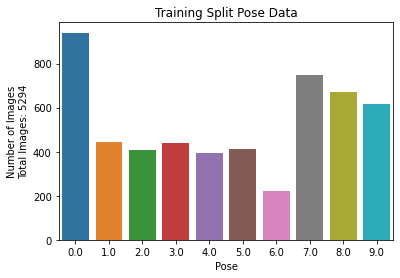

In [19]:
# Plot count of each pose in training set
ax = sns.countplot(x="Pose", data=df_train)
ax.set_title('Training Split Pose Data')
plt.xlabel('Pose')
plt.ylabel(f"Number of Images\nTotal Images: {len(df_train)}")
plt.show()

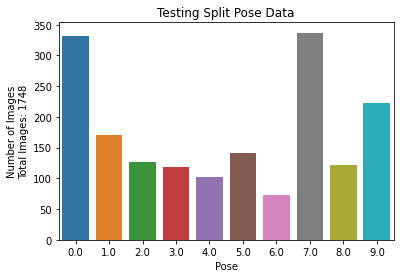

In [18]:
# Plot count of each pose in testing set
ax = sns.countplot(x="Pose", data=df_test)
ax.set_title('Testing Split Pose Data')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\nTotal Images: {len(df_test)}')
plt.show()

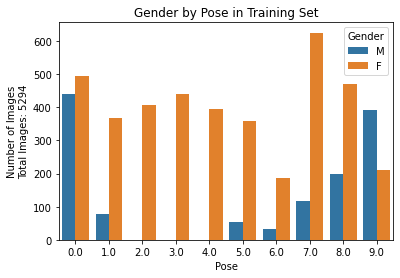

In [22]:
# Plot gender data for training set
ax = sns.countplot(x='Pose', hue='Gender', data=df_train)
ax.set_title('Gender by Pose in Training Set')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\nTotal Images: {len(df_train)}')
plt.show()

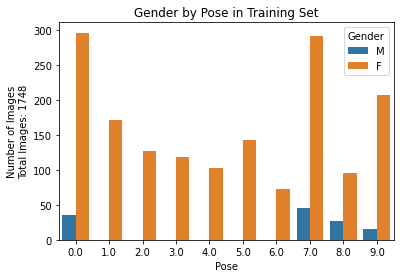

In [23]:
# Plot gender data for testing set
ax = sns.countplot(x='Pose', hue='Gender', data=df_test)
ax.set_title('Gender by Pose in Testing Set')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\nTotal Images: {len(df_test)}')
plt.show()

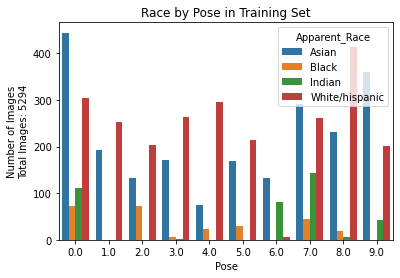

In [26]:
# Plot racial data for training set
order = ['Asian', 'Black', 'Indian', 'White/hispanic']
ax = sns.countplot(x='Pose', hue='Apparent_Race', data=df_train, hue_order=order)
ax.set_title('Race by Pose in Training Set')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\nTotal Images: {len(df_train)}')
plt.show()

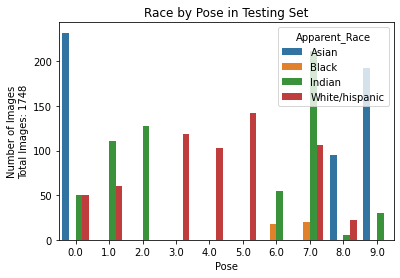

In [27]:
# Plot racial data for testing set
ax = sns.countplot(x='Pose', hue='Apparent_Race', data=df_test, hue_order=order)
ax.set_title('Race by Pose in Testing Set')
plt.xlabel('Pose')
plt.ylabel(f'Number of Images\nTotal Images: {len(df_test)}')
plt.show()

# Modeling

In [33]:
# Creator based feature split
X_train = features[creator.isin(train_creators)]
X_test = features[creator.isin(test_creators)]

# Scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creator based label split
y_train = labels[creator.isin(train_creators)]
y_train_categorical = to_categorical(y_train)
y_test = labels[creator.isin(test_creators)]
y_test_categorical = to_categorical(y_test)

# Random split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(features, labels, test_size=0.25, random_state=42)
y_train_rand_categorical = to_categorical(y_train_rand)
y_test_rand_categorical = to_categorical(y_test_rand)

In [38]:
model_storage = {}

## Logistic Regression

In [51]:
# Creator Based Test/Train Split
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')
model_storage['LR - Creator Split'] = classification_report(y_test, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Accuracy: 0.7053775743707094
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       332
           1       0.56      0.39      0.46       171
           2       0.77      0.80      0.78       127
           3       0.58      0.90      0.71       119
           4       1.00      0.47      0.64       103
           5       0.94      0.95      0.94       142
           6       0.40      0.42      0.41        73
           7       0.60      0.66      0.63       337
           8       0.82      0.87      0.84       122
           9       0.81      0.74      0.77       222

    accuracy                           0.71      1748
   macro avg       0.72      0.70      0.69      1748
weighted avg       0.72      0.71      0.70      1748



In [53]:
# Random Test/Train Split
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
lr.fit(X_train_rand, y_train_rand)
y_pred = lr.predict(X_test_rand)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test_rand, y_pred)}')
model_storage['LR - Rand Split'] = classification_report(y_test_rand, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test_rand, y_pred)}")

Logistic Regression Accuracy: 0.8182850653038046
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       321
           1       0.65      0.62      0.63       161
           2       0.90      0.95      0.93       139
           3       0.90      0.94      0.92       130
           4       0.87      0.81      0.84       120
           5       0.95      0.95      0.95       133
           6       0.76      0.68      0.71        74
           7       0.80      0.85      0.83       266
           8       0.86      0.91      0.88       190
           9       0.76      0.86      0.81       227

    accuracy                           0.82      1761
   macro avg       0.82      0.82      0.82      1761
weighted avg       0.82      0.82      0.82      1761



## NN 

In [62]:
# Creator Based Test/Train Split
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Creator Split Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Get classification report
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
model_storage['NN - Creator Split'] = classification_report(y_test, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Epoch 1/100
166/166 [==============================] - 2s 4ms/step - loss: 4.1976 - accuracy: 0.5837 - val_loss: 4.3608 - val_accuracy: 0.2883
Epoch 2/100
166/166 [==============================] - 1s 3ms/step - loss: 2.9092 - accuracy: 0.7393 - val_loss: 3.3539 - val_accuracy: 0.4050
Epoch 3/100
166/166 [==============================] - 1s 4ms/step - loss: 2.2004 - accuracy: 0.7877 - val_loss: 2.3917 - val_accuracy: 0.6053
Epoch 4/100
166/166 [==============================] - 1s 3ms/step - loss: 1.7213 - accuracy: 0.8126 - val_loss: 2.0631 - val_accuracy: 0.6487
Epoch 5/100
166/166 [==============================] - 1s 4ms/step - loss: 1.4142 - accuracy: 0.8217 - val_loss: 1.9701 - val_accuracy: 0.5624
Epoch 6/100
166/166 [==============================] - 1s 3ms/step - loss: 1.2006 - accuracy: 0.8328 - val_loss: 1.8175 - val_accuracy: 0.6333
Epoch 7/100
166/166 [==============================] - 0s 3ms/step - loss: 1.0495 - accuracy: 0.8421 - val_loss: 1.7972 - val_accuracy: 0.6030

In [65]:
# Random Based Test/Train Split
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_rand.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train_rand)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test_rand, y_test_rand_categorical))

# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_rand, y_test_rand_categorical, verbose=2)
print(f"Random Split Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Get classification report
y_pred = model.predict(X_test_rand)
y_pred = y_pred.argmax(axis=1)
model_storage['NN - Random Split'] = classification_report(y_test_rand, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test_rand, y_pred)}")


Epoch 1/100
166/166 [==============================] - 2s 5ms/step - loss: 4.2556 - accuracy: 0.5669 - val_loss: 4.4842 - val_accuracy: 0.1380
Epoch 2/100
166/166 [==============================] - 1s 4ms/step - loss: 2.8923 - accuracy: 0.7509 - val_loss: 3.4332 - val_accuracy: 0.4151
Epoch 3/100
166/166 [==============================] - 1s 4ms/step - loss: 2.2013 - accuracy: 0.7873 - val_loss: 2.2042 - val_accuracy: 0.6701
Epoch 4/100
166/166 [==============================] - 1s 4ms/step - loss: 1.7447 - accuracy: 0.8013 - val_loss: 1.5658 - val_accuracy: 0.8279
Epoch 5/100
166/166 [==============================] - 1s 3ms/step - loss: 1.4352 - accuracy: 0.8181 - val_loss: 1.2812 - val_accuracy: 0.8268
Epoch 6/100
166/166 [==============================] - 1s 5ms/step - loss: 1.2215 - accuracy: 0.8285 - val_loss: 1.1862 - val_accuracy: 0.8132
Epoch 7/100
166/166 [==============================] - 1s 4ms/step - loss: 1.0709 - accuracy: 0.8379 - val_loss: 1.0603 - val_accuracy: 0.8217

# Random Forest

In [68]:
# Creator Based Test/Train Split
rf = RandomForestClassifier(n_estimators=250, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred)}')
model_storage['RF - Creator Split'] = classification_report(y_test, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Random Forest Accuracy: 0.6516018306636155
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       332
           1       0.00      0.00      0.00       171
           2       0.90      0.94      0.92       127
           3       0.88      0.78      0.83       119
           4       1.00      0.36      0.53       103
           5       0.96      0.90      0.93       142
           6       0.62      0.34      0.44        73
           7       0.41      0.47      0.44       337
           8       0.88      0.87      0.88       122
           9       0.68      0.85      0.76       222

    accuracy                           0.65      1748
   macro avg       0.69      0.64      0.64      1748
weighted avg       0.62      0.65      0.62      1748



In [69]:
# Random Based Test/Train Split
rf = RandomForestClassifier(n_estimators=250, max_depth = 8, random_state=42)
rf.fit(X_train_rand, y_train_rand)
y_pred = rf.predict(X_test_rand)
print(f'Random Forest Accuracy: {accuracy_score(y_test_rand, y_pred)}')
model_storage['RF - Random Split'] = classification_report(y_test_rand, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test_rand, y_pred)}")

Random Forest Accuracy: 0.889267461669506
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       321
           1       0.92      0.75      0.82       161
           2       0.95      0.96      0.96       139
           3       0.97      0.95      0.96       130
           4       0.92      0.92      0.92       120
           5       0.95      0.95      0.95       133
           6       0.98      0.81      0.89        74
           7       0.82      0.94      0.88       266
           8       0.91      0.96      0.93       190
           9       0.85      0.93      0.89       227

    accuracy                           0.89      1761
   macro avg       0.91      0.89      0.90      1761
weighted avg       0.89      0.89      0.89      1761



# Gaussian Naive Bayes

In [71]:
# GNB with Creator based test/train split
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}')
model_storage['GNB - Creator Split'] = classification_report(y_test, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Gaussian Naive Bayes Accuracy: 0.45423340961098396
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.48      0.57       332
           1       0.14      0.09      0.11       171
           2       0.63      0.92      0.75       127
           3       0.81      0.90      0.85       119
           4       0.73      0.26      0.39       103
           5       0.92      0.80      0.85       142
           6       0.06      0.29      0.09        73
           7       0.45      0.44      0.45       337
           8       0.78      0.57      0.65       122
           9       0.12      0.07      0.09       222

    accuracy                           0.45      1748
   macro avg       0.53      0.48      0.48      1748
weighted avg       0.52      0.45      0.47      1748



In [72]:
# GNB with Random based test/train split
gnb = GaussianNB()
gnb.fit(X_train_rand, y_train_rand)
y_pred = gnb.predict(X_test_rand)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_score(y_test_rand, y_pred)}')
model_storage['GNB - Random Split'] = classification_report(y_test_rand, y_pred, output_dict=True)
print(f"Classification Report:\n{classification_report(y_test_rand, y_pred)}")

Gaussian Naive Bayes Accuracy: 0.5587734241908007
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.41      0.55       321
           1       0.54      0.30      0.38       161
           2       0.76      0.97      0.85       139
           3       0.83      0.69      0.75       130
           4       0.68      0.85      0.76       120
           5       0.68      0.95      0.79       133
           6       0.16      0.89      0.27        74
           7       0.46      0.48      0.47       266
           8       0.84      0.53      0.65       190
           9       0.71      0.24      0.36       227

    accuracy                           0.56      1761
   macro avg       0.65      0.63      0.58      1761
weighted avg       0.68      0.56      0.57      1761



## Plot Comparisons

In [158]:
# Make dictionaries to color/shape code results
color_dict = {key: ('r' if "LR" in key else 'g' if "RF" in key else 'b' if "GNB" in key else 'y') for key in model_storage.keys()}
marker_dict = {key: ("o" if "Creator" in key else "x") for key in model_storage.keys()}

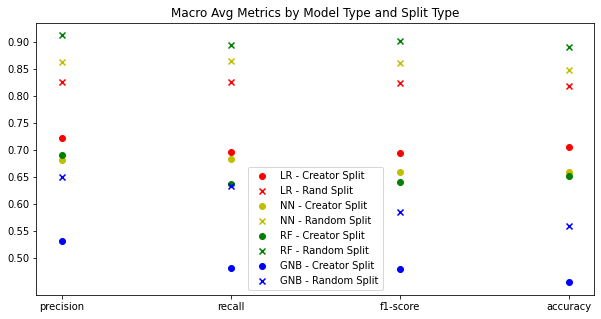

In [159]:
x_keys = ['precision', 'recall', 'f1-score']
x_ticks = x_keys + ['accuracy']
for key in model_storage.keys():
    y_plot = []
    for i in x_keys:
        y_plot.append(model_storage[key]['macro avg'][i])
    y_plot.append(model_storage[key]['accuracy'])
    plt.scatter(x_ticks, y_plot, marker=marker_dict[key], color=color_dict[key], label=key)
plt.legend(model_storage.keys())
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Macro Avg Metrics by Model Type and Split Type')
plt.yticks(np.arange(0.5, 0.95, step=0.05))
plt.show()

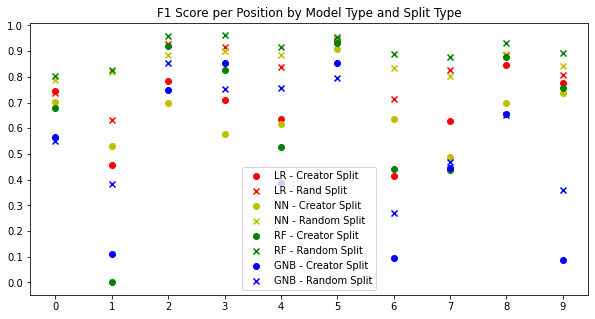

In [166]:
for key in model_storage.keys():
    f1 = []
    y_val = []
    for i in range(0,10):
        f1.append(model_storage[key][str(i)]['f1-score'])
        y_val.append(i)
    plt.scatter(y_val, f1, label=key, marker=marker_dict[key], color=color_dict[key])
plt.xticks(y_val)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('F1 Score per Position by Model Type and Split Type')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
